In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import random

In [38]:
with open("D:/Projects/SignClassifier/train.p",mode='rb') as training_data:
    train=pickle.load(training_data)
with open("D:/Projects/SignClassifier/test.p",mode='rb') as testing_data:
    test=pickle.load(testing_data)
with open("D:/Projects/SignClassifier/valid.p",mode='rb') as validating_data:
    validate=pickle.load(validating_data)

In [39]:
X_train,y_train=train['features'],train['labels']
X_test,y_test=test['features'],test['labels']
X_validation,y_validation=validate['features'],validate['labels']
X_train.shape
print(y_train.shape)

(34799,)


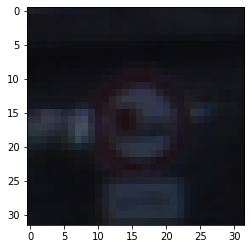

In [40]:
i=np.random.randint(0,len(X_train))
plt.imshow(X_train[i])
y_train[i]
l_grid=5
w_grid=5

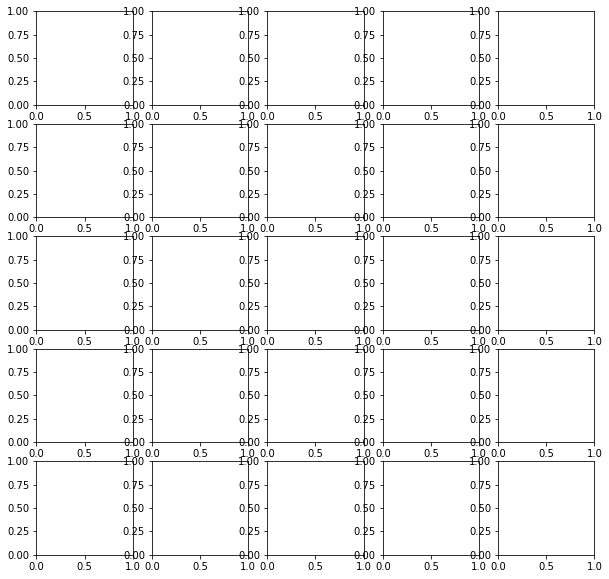

In [41]:
fig,axes=plt.subplots(l_grid,w_grid,figsize=(10,10))

In [42]:
axes=axes.ravel()
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D281A0488>,
      dtype=object)

In [43]:
#4 . 
for i in np.arange(0,w_grid*l_grid):
    randIndex=np.random.randint(0,len(X_train))
    axes[i].imshow(X_train[randIndex])
    axes[i].set_title(y_train[randIndex],fontsize=12)
    axes[i].axis('off')
plt.subplots_adjust(hspace= 0.4)


<Figure size 432x288 with 0 Axes>

In [62]:
#4 convert images grayscale and normalize:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)
#grayscale
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)
X_validation_gray=np.sum(X_validation/3,axis=3,keepdims=True)
X_train.shape
#normalize:
X_train_gray_norm=(X_train_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128
X_validation_gray_norm=(X_validation_gray-128)/128
X_train_gray_norm
X_validation_gray_norm


array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


In [45]:
#6 build cnn model:
from tensorflow.keras import datasets,layers,models

In [46]:
CNN=models.Sequential()
CNN.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())
CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5),activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())
CNN.add(layers.Dense(120,activation='relu'))
CNN.add(layers.Dense(84,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_11 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_12 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)              

In [47]:
CNN.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [63]:
history=CNN.fit(X_train_gray_norm,y_train,batch_size=500,epochs=5,verbose=1,validation_data=(X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/5
34799/34799 [==============================] - 12s 343us/sample - loss: 3.2252 - acc: 0.1551 - val_loss: 2.7559 - val_acc: 0.3109
Epoch 2/5
34799/34799 [==============================] - 11s 303us/sample - loss: 1.9448 - acc: 0.4587 - val_loss: 1.6513 - val_acc: 0.5256
Epoch 3/5
34799/34799 [==============================] - 11s 302us/sample - loss: 1.2586 - acc: 0.6348 - val_loss: 1.1559 - val_acc: 0.6705
Epoch 4/5
34799/34799 [==============================] - 10s 293us/sample - loss: 0.9215 - acc: 0.7333 - val_loss: 0.8859 - val_acc: 0.7431
Epoch 5/5
34799/34799 [==============================] - 10s 297us/sample - loss: 0.7247 - acc: 0.7886 - val_loss: 0.7434 - val_acc: 0.7839


In [64]:
#7 score and plot confusion
score=CNN.evaluate(X_test_gray_norm,y_test)
print("score {}".format(score[1]))

12630/12630 [==============================] - 2s 144us/sample - loss: 1.0044 - acc: 0.7570
score 0.7570071220397949


In [65]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [68]:
accuracy=history.history['acc']
val_accuracy=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

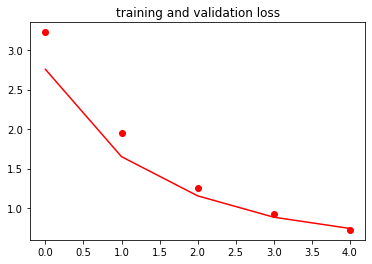

In [71]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('training and validation loss')